В цьому домашньому завданні ми побудуємо рішення задачі логістичної регресії і створимо ваш перший submission на змагання на Kaggle. Усі кроки були розглянуті в лекції та містяться в ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb`, але тепер ми їх адаптуємо до іншої задачі - все як в реальному житті, коли ви знайшли код у відкритих джерелах і адаптуєте на проєкті 😉

**Погнали! 🚀🚀🚀**

-----------



0. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/edce80b5bb02479085855b2334b17fc1). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

1. Зчитайте дані `train.csv` в pandas dataframe та розбийте їх на train і validation піднабори.

  * Є такий параметр в методі train_test_split як stratified. Можливо він буде Вам корисним при розбитті даних в цій задачі. Пропоную Вам почитати про нього в документації і спробувати скористатись.

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
file_path = "C:/Users/linam/ML_Projects/HW/2.2/2.2_Побудова логістичної регресії в Sklearn/train.csv"
df = pd.read_csv(file_path)

In [5]:
# Розбиваємо з використанням стратифікації по цільовій змінній
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["Exited"], random_state=42)

2. Визначіть назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створіть набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [6]:
target_col = "Exited"
input_cols = [col for col in df.columns if col != target_col]

train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

3. Визначіть з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запишіть результати в `numeric_cols` та `categorical_cols` відповідно.

In [7]:
numeric_cols = train_inputs.select_dtypes(include="number").columns.tolist()
categorical_cols = train_inputs.select_dtypes(include="object").columns.tolist()

In [8]:
numeric_cols

['id',
 'CustomerId',
 'CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary']

In [9]:
categorical_cols 

['Surname', 'Geography', 'Gender']

4. Зробіть підготовку даних в категоріальних і числових колонках для входу в модель виходячи з освоєного на даний момент на курсі. Варіанти пеердобробки, з якими ми вже знайомі:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо ми вважаємо, що ці дані нерелевантні для моделі аби ми не бачимо способу як їх так закодувати, аби подати на вхід моделі.

  Тут є багато варіантів, як Ви побудуєте передобробку, важливо аби
  1) передобробка мала сенс (немає сенсу заповнювати дані константою, яку ми не зрозуміло звідки взяли)   
  2) має бути виконана принаймні одна дія передобробки
  3) обробка маэ бути виконана коректно і для тренувальних, і для вал. даних
  4) чим вищий у Вас врешті вийде ROС AUC скор, тим більше шансів перемогти у змаганні :)

  Опишіть рішення проведення кожного з кроків передобробки. Для чого ви його робите? По завершенню виведіть по 5 значен з `train_inputs`, `val_inputs` використовуючи `display()`.

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [11]:
# Пайплайн для числових ознак
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

In [12]:
# Пайплайн для категоріальних ознак
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [14]:
# Обʼєднаний трансформер
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols)
    ]
)

In [15]:
# Фіт та трансформування
preprocessor.fit(train_inputs)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['id', 'CustomerId', 'CreditScore', 'Age',
                                  'Tenure', 'Balance', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember',
                                  'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Surname', 'Geography', 'Gender'])])

In [16]:
train_inputs_processed = preprocessor.transform(train_inputs)
val_inputs_processed = preprocessor.transform(val_inputs)

In [17]:
# Для display()
from IPython.display import display
display(pd.DataFrame(train_inputs_processed).head())
display(pd.DataFrame(val_inputs_processed).head())

,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


,0
0,<Compressed Sparse Row sparse matrix of dtype ...
1,<Compressed Sparse Row sparse matrix of dtype ...
2,<Compressed Sparse Row sparse matrix of dtype ...
3,<Compressed Sparse Row sparse matrix of dtype ...
4,<Compressed Sparse Row sparse matrix of dtype ...


In [20]:
# Перетворюємо у звичайну матрицю
train_df_display = pd.DataFrame(train_inputs_processed.toarray())
val_df_display = pd.DataFrame(val_inputs_processed.toarray())

# Виводимо
from IPython.display import display
display(train_df_display.head())
display(val_df_display.head())

,0,1,2,3,4,5,6,7,8,9,...,737,738,739,740,741,742,743,744,745,746
0,-0.069136,-0.263441,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.672227,-0.666919,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.707380,0.569420,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.949404,0.610162,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.097479,-0.332313,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,0,1,2,3,4,5,6,7,8,9,...,737,738,739,740,741,742,743,744,745,746
0,-0.228346,0.703904,0.762592,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.884566,-0.500773,-0.910252,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.501540,0.660086,0.997620,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.575398,0.765385,0.195761,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.119689,0.554699,0.264887,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [22]:
# Отримати імена колонок після OneHotEncoding
encoded_cat_cols = preprocessor.named_transformers_["cat"]["onehot"].get_feature_names_out(categorical_cols)

# Об'єднати з numeric_cols
all_feature_names = numeric_cols + encoded_cat_cols.tolist()

# Тепер створити DataFrame з назвами колонок
train_df_display = pd.DataFrame(train_inputs_processed.toarray(), columns=all_feature_names)
val_df_display = pd.DataFrame(val_inputs_processed.toarray(), columns=all_feature_names)

# Виводимо
display(train_df_display.head())
display(val_df_display.head())

,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zito,Surname_Zox,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.069136,-0.263441,0.320187,-0.944682,-1.447264,1.475464,-1.108193,0.515062,1.016977,0.569450,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.672227,-0.666919,0.347838,0.161227,-1.087792,2.254434,-1.108193,0.515062,-0.983306,0.603803,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,-1.707380,0.569420,0.638166,-0.330288,0.350096,1.223831,0.769304,0.515062,-0.983306,1.238026,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,-0.949404,0.610162,0.140460,2.495924,-1.806736,-0.717950,0.769304,-1.941514,1.016977,-1.457116,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.097479,-0.332313,0.665816,-2.050591,-0.728320,-0.717950,0.769304,0.515062,1.016977,0.670629,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,id,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Surname_Zito,Surname_Zox,Surname_Zuev,Surname_Zuyev,Surname_Zuyeva,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,-0.228346,0.703904,0.762592,1.021379,-1.447264,1.214543,4.524299,0.515062,1.016977,-0.988144,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,-0.884566,-0.500773,-0.910252,0.406985,-0.009376,-0.717950,0.769304,0.515062,1.016977,-1.750392,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.501540,0.660086,0.997620,0.038348,-1.087792,-0.717950,0.769304,-1.941514,1.016977,-0.022404,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-1.575398,0.765385,0.195761,0.652742,-0.368848,1.881867,-1.108193,-1.941514,1.016977,-0.139723,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,-1.119689,0.554699,0.264887,-0.944682,-0.368848,-0.717950,0.769304,0.515062,-0.983306,0.563519,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


5. Збережіть дані, що містяться в змінних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` на диск в форматі `parquet`. В кінці виведіть список файлів в папці, в яку Ви зберегли файли і перевірте, чи файли збереглись. Вивести список файлів можна з `os.listdir(your_dir)` або `!ls your_dir`

In [25]:
!pip install pyarrow

   ---------------------------------------- 0.0/25.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/25.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/25.3 MB 2.6 MB/s eta 0:00:10
   -- ------------------------------------- 1.8/25.3 MB 3.2 MB/s eta 0:00:08
   ---- ----------------------------------- 2.6/25.3 MB 3.4 MB/s eta 0:00:07
   ----- ---------------------------------- 3.7/25.3 MB 3.7 MB/s eta 0:00:06
   ------- -------------------------------- 5.0/25.3 MB 4.2 MB/s eta 0:00:05
   --------- ------------------------------ 6.0/25.3 MB 4.4 MB/s eta 0:00:05
   ----------- ---------------------------- 7.3/25.3 MB 4.6 MB/s eta 0:00:04
   -------------- ------------------------- 8.9/25.3 MB 4.9 MB/s eta 0:00:04
   --------------- ------------------------ 10.0/25.3 MB 5.1 MB/s eta 0:00:03
   ------------------ --------------------- 11.8/25.3 MB 5.4 MB/s eta 0:00:03
   --------------------- ------------------ 13.4/25.3 MB 5.5 MB/s eta 0:00:03
   -------


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
!pip install fastparquet

   ---------------------------------------- 0.0/673.3 kB ? eta -:--:--
   --------------- ------------------------ 262.1/673.3 kB ? eta -:--:--
   ---------------------------------------- 673.3/673.3 kB 3.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ------------------ --------------------- 0.8/1.7 MB 4.8 MB/s eta 0:00:01
   ------------------------------------- -- 1.6/1.7 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 3.8 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [28]:
import os

# Вказуємо повний шлях до директорії, де зберігаємо дані
save_dir = "C:/Users/linam/ML_Projects/HW/2.2/2.2_Побудова логістичної регресії в Sklearn"
os.makedirs(save_dir, exist_ok=True)

# Зберігаємо parquet файли
train_inputs.to_parquet(f"{save_dir}/train_inputs.parquet")
train_targets.to_frame().to_parquet(f"{save_dir}/train_targets.parquet")
val_inputs.to_parquet(f"{save_dir}/val_inputs.parquet")
val_targets.to_frame().to_parquet(f"{save_dir}/val_targets.parquet")

In [29]:

# Виводимо список збережених файлів
print(os.listdir(save_dir))

['.ipynb_checkpoints', 'HW_2_2_Логістична_регресія_з_scikit_learn.ipynb', 'processed_data', 'sample_submission.csv', 'test.csv', 'train.csv', 'train_inputs.parquet', 'train_targets.parquet', 'val_inputs.parquet', 'val_targets.parquet']


6. З підготовлених вхіжних даних створіть `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі. Навчіть модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
X_train = train_inputs_processed
X_val = val_inputs_processed

In [32]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, train_targets)

LogisticRegression(max_iter=1000)

7. Виведіть Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних. Що можете сказати про якіст моделі? Вона хороша, погана, задовільна?

In [33]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score, roc_curve, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [34]:
# Прогнози
train_probs = model.predict_proba(X_train)[:, 1]
val_probs = model.predict_proba(X_val)[:, 1]

In [35]:
# Класи при порозі 0.5
train_preds = (train_probs >= 0.5).astype(int)
val_preds = (val_probs >= 0.5).astype(int)

In [36]:
# Метрики
print("Train AUROC:", roc_auc_score(train_targets, train_probs))
print("Val AUROC:", roc_auc_score(val_targets, val_probs))
print("Train F1:", f1_score(train_targets, train_preds))
print("Val F1:", f1_score(val_targets, val_preds))

Train AUROC: 0.9020915282685528
Val AUROC: 0.8848329789423144
Train F1: 0.6712328767123288
Val F1: 0.6484517304189436


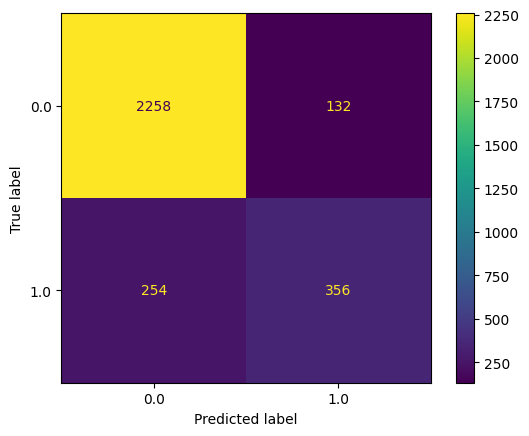

In [37]:
# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(val_targets, val_preds)
plt.show()

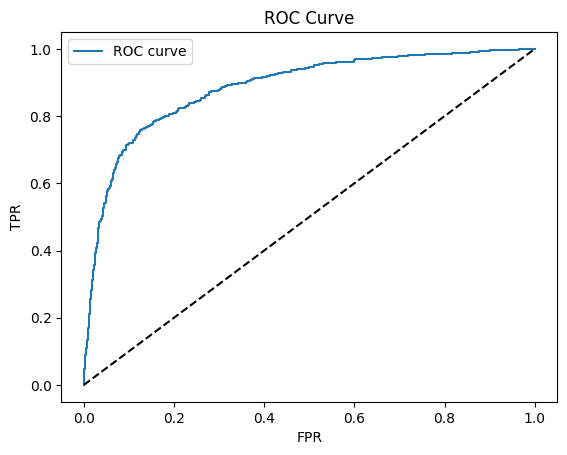

In [38]:
# ROC-крива
fpr, tpr, _ = roc_curve(val_targets, val_probs)
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()

8. Створіть передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахуйте Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що ми натренували в п.6. Зробіть заключення про якість нашої моделі: якість хороша, погана, задовільна?

In [54]:
# Мажоритарний клас
majority_class = train_targets.mode()[0]

In [53]:
train_dummy_preds = [majority_class] * len(train_targets)
val_dummy_preds = [majority_class] * len(val_targets)

In [42]:
from sklearn.metrics import accuracy_score

In [55]:
print("Dummy train acc:", accuracy_score(train_targets, train_dummy_preds))
print("Dummy val acc:", accuracy_score(val_targets, val_dummy_preds))
print("Our model val acc:", accuracy_score(val_targets, val_preds))

Dummy train acc: 0.7965
Dummy val acc: 0.7966666666666666
Our model val acc: 0.8713333333333333


9. Збережіть модель і інші обʼєкти, які ви хотіли б зберегти, з використанням бібліотеки joblib в файл `log_reg.joblib`. Потім завантажте модель з файлу в змінну `model_2` (цим ми тренуємось завантажувати модель з файлу на майбутнє).

In [56]:
import joblib

In [57]:
joblib.dump(model, "log_reg.joblib")
joblib.dump(preprocessor, "preprocessor.joblib")

['preprocessor.joblib']

In [58]:
# Завантаження
model_2 = joblib.load("log_reg.joblib")

10. Ознайомтесь з роботою наведеної функції `predict_raw_df`. Ця функція робить підготовку даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

Доповніть або внесіть зміни у функцію з врахуванням вашого препроцесингу даних.

In [59]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

In [62]:
predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, raw_df[:5])

NameError: name 'scaler' is not defined

In [63]:
def predict_raw_df(preprocessor, model, input_df: pd.DataFrame):
    processed = preprocessor.transform(input_df)
    prob = model.predict_proba(processed)[:, 1]
    return prob

In [64]:
print(type(preprocessor))
print(type(model))

<class 'sklearn.compose._column_transformer.ColumnTransformer'>
<class 'sklearn.linear_model._logistic.LogisticRegression'>


11. Зчитайте дані з `test.csv` в змінну `test_raw_df`. Зробіть передбачення для кожного рядка даних з функцією з попереднього завдання і запишіть результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [66]:
test_raw_df = pd.read_csv("test.csv")
test_probs = predict_raw_df(preprocessor, model, test_raw_df)
test_raw_df["Exited"] = test_probs

12. Зчитайте файл 'sample_submission.csv' і зповніть колонку `Exited` передбаченими вашою моделлю значеннями для кожного відповідного `id` клієнта.
Виведіть перші 5 рядків фінального датасету, збережіть результат в файл `submission_log_reg.csv` (УВАГА! не запишіть випадково ще індекси рядків!) і здайте цей файл на Kaggle зі свого профіля натиснувши `Submit Prediction`.

In [67]:
submission = pd.read_csv("sample_submission.csv")
submission["Exited"] = test_raw_df["Exited"].values
submission.to_csv("submission_log_reg.csv", index=False)
submission.head()

,id,Exited
0,15000,0.022904
1,15001,0.049001
2,15002,0.071544
3,15003,0.285672
4,15004,0.036681
